In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

C:\Users\Hello\AppData\Local\Temp\ipykernel_10296\2041595320.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RowNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389,15767821,15737173,15632264,15691483,15600882,15643966,15737452,15788218,15661507,15568982
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?,Bearce,Andrews,Kay,Chin,Scott,Goforth,Romeo,Henderson,Muldrow,Hao
CreditScore,619,608,502,699,850,645,822,376,501,684,528,497,476,549,635,616,653,549,587,726
Geography,France,Spain,France,France,Spain,Spain,France,Germany,France,France,France,Spain,France,France,Spain,Germany,Germany,Spain,Spain,France
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male,Male,Male,Female,Female,Female,Male,Male,Female,Male,Female
Age,42,41,42,39,43,44,50,29,44,27,31,24,34,25,35,45,58,24,45,24
Tenure,2,1,8,1,2,8,7,4,4,2,6,3,10,5,7,3,1,9,6,6
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88,102016.72,0.0,0.0,0.0,0.0,143129.41,132602.88,0.0,0.0,0.0
NumOfProducts,1,1,3,2,1,2,2,4,2,1,2,2,2,2,2,2,1,2,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [7]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [9]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [10]:
df["Balance"]=(df["Balance"]-df["Balance"].min())/(df["Balance"].max()-df["Balance"].min())

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,3.048484e-01,0.248696,0.00,0.00,3.874025e-01,5.087493e-01,1.00
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [12]:
df=df.drop("RowNumber",axis=1)
df=df.drop("CustomerId",axis=1)
df=df.drop("Surname",axis=1)

In [13]:
label_encoder = LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Geography']=label_encoder.fit_transform(df['Geography'])

<AxesSubplot:>

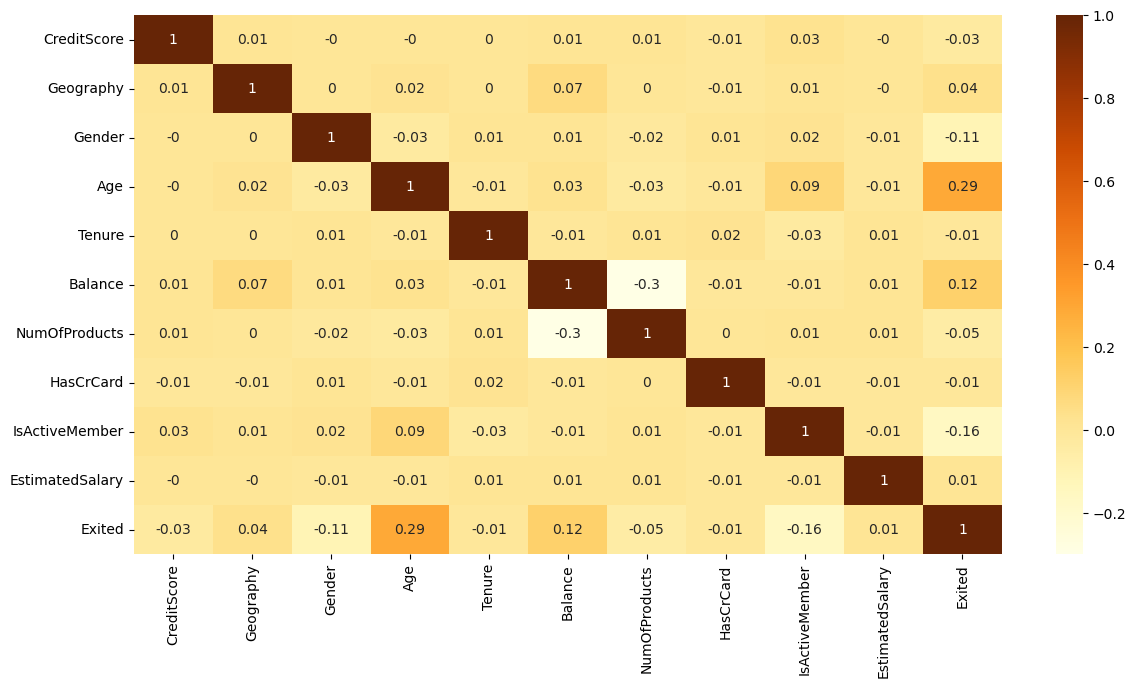

In [14]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [15]:
ProfileReport(df, title='Pandas Profiling Report', explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
x=df.drop('Exited',axis=1)
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.7935
Confusion Matrix:
[[1565   38]
 [ 375   22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1603
           1       0.37      0.06      0.10       397

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.73      2000

